 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [371]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot 
import seaborn as sns
%matplotlib inline



# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [372]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

whale_returns_df = pd.read_csv(whale_returns_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
whale_returns_df.sort_index(ascending = True, inplace = True)
print(whale_returns_df.head())


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  


In [373]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [374]:
# Drop nulls
whale_returns_df.dropna(inplace = True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [375]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
algo_returns_df.sort_index(ascending = True, inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [376]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [377]:
# Drop nulls
algo_returns_df.dropna(inplace = True)
algo_returns_df.isnull().sum()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [378]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
sp500_df.sort_index(ascending = True, inplace = True)

#remove dollar signs
sp500_df['Close']= sp500_df['Close'].str.replace('$','')
 
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [379]:
# Check Data Types
print(whale_returns_df.dtypes)
print(algo_returns_df.dtypes)
print(sp500_df.dtypes)

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object
Algo 1    float64
Algo 2    float64
dtype: object
Close    object
dtype: object


In [380]:
# Fix Data Types
sp500_df['Close']= sp500_df['Close'].astype('float')
print(sp500_df.dtypes)
print(sp500_df.head())

Close    float64
dtype: object
              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93


In [381]:
# Calculate Daily Returns
sp500_df["SP500 Daily"] = sp500_df.pct_change()
print(sp500_df.head())

              Close  SP500 Daily
Date                            
2012-10-01  1444.49          NaN
2012-10-02  1445.75     0.000872
2012-10-03  1450.99     0.003624
2012-10-04  1461.40     0.007174
2012-10-05  1460.93    -0.000322


In [382]:
# Drop nulls
sp500_df.isnull().sum()
sp500_df.dropna(inplace = True)
sp500_df.isnull().sum()

Close          0
SP500 Daily    0
dtype: int64

In [383]:
# Rename Column - Drop the close column because it is not needed
sp500_df.drop("Close",axis = 1, inplace = True)
sp500_df.head()

,SP500 Daily
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [384]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_df], axis = 'columns', join = 'inner')
combined_df.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

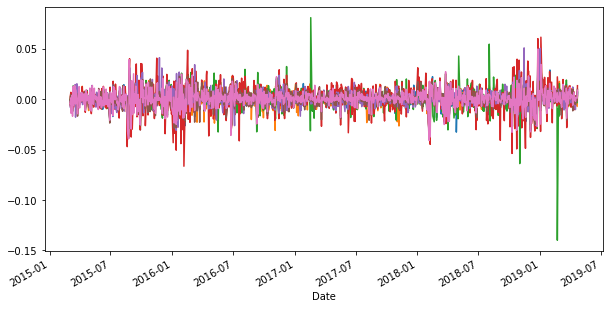

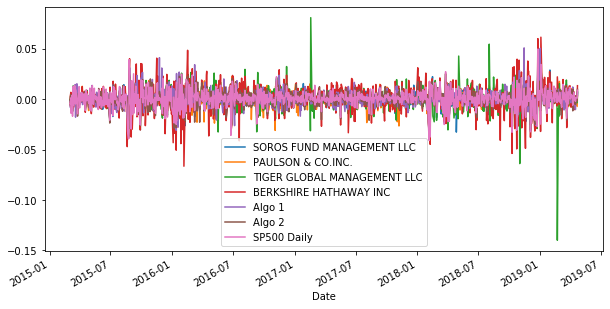

In [385]:
# Plot daily returns
combined_df["SOROS FUND MANAGEMENT LLC"].plot(figsize=(10,5))
combined_df["PAULSON & CO.INC. "].plot(figsize=(10,5))
combined_df["TIGER GLOBAL MANAGEMENT LLC"].plot(figsize=(10,5))
combined_df["BERKSHIRE HATHAWAY INC"].plot(figsize=(10,5))
combined_df["Algo 1"].plot(figsize=(10,5))
combined_df["Algo 2"].plot(figsize=(10,5))
combined_df["SP500 Daily"].plot(figsize=(10,5))
combined_df.plot(figsize=(10,5))

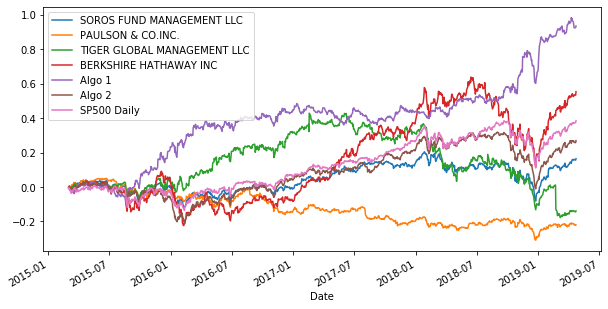

In [386]:
# Plot cumulative returns
((combined_df + 1).cumprod() - 1).plot(figsize=(10,5))



---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

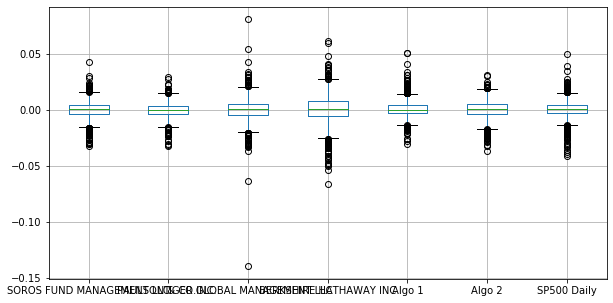

In [387]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(10,5))


In [388]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?

combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Daily                    0.008554
dtype: float64

In [389]:
# Determine which portfolios are riskier than the S&P 500
for col in combined_df:
    if combined_df[col].std()> combined_df['SP500 Daily'].std():
        print(f'{col} is riskier than the S&P 500')
    elif combined_df[col].std() < combined_df['SP500 Daily'].std():
        print(f'{col} is less risky than the S&P 500')
    else:
        print(f'{col} has the same risk as the S&P 500')

SOROS FUND MANAGEMENT LLC is less risky than the S&P 500
PAULSON & CO.INC.  is less risky than the S&P 500
TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P 500
BERKSHIRE HATHAWAY INC is riskier than the S&P 500
Algo 1 is less risky than the S&P 500
Algo 2 is less risky than the S&P 500
SP500 Daily has the same risk as the S&P 500


In [431]:
# Calculate the annualized standard deviation (252 trading days)

annualized = combined_df.std() * np.sqrt(252)
annualized.sort_values(inplace=True)
print(annualized)

ema21                          0.015301
PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500 Daily                    0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

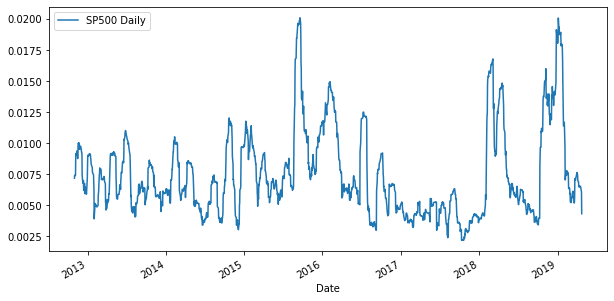

In [391]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_df.rolling(window=21).std().plot(figsize=(10,5))

In [392]:
# Correlation
corr_matrix = combined_df.corr()
print(corr_matrix)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
SP500 Daily                                   0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2         

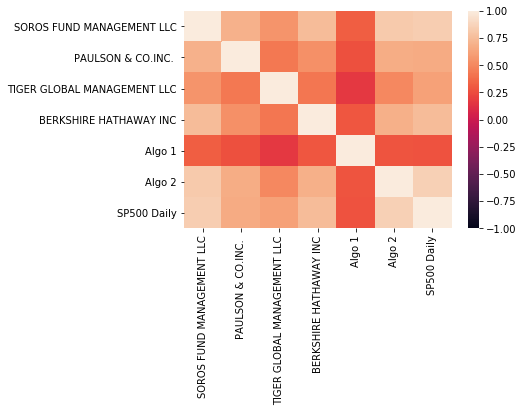

In [393]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1)

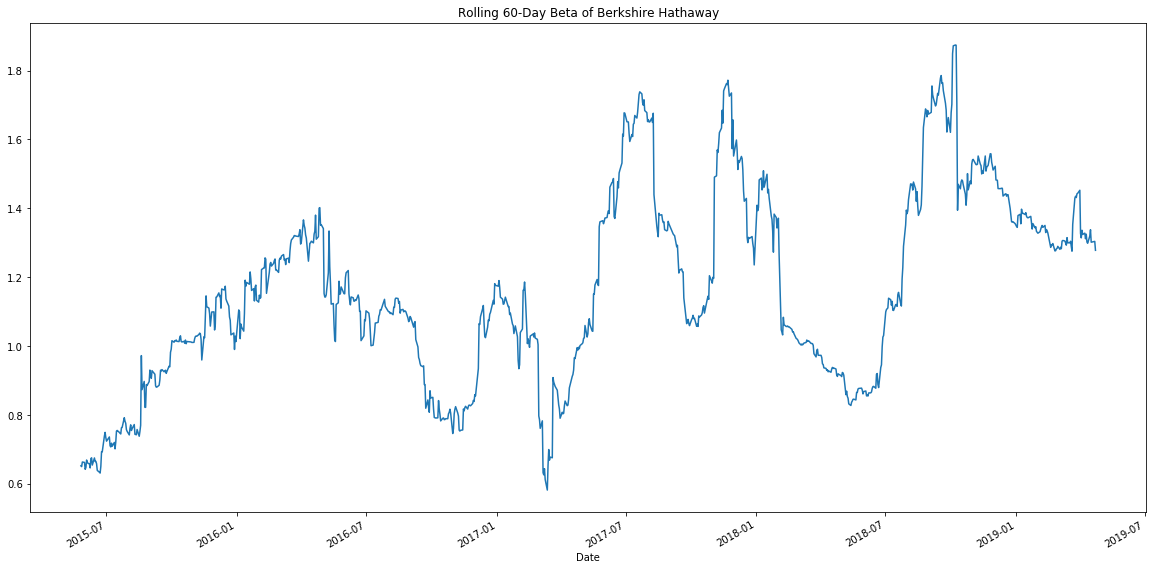

In [427]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['SP500 Daily'])
rolling_variance = combined_df['SP500 Daily'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Berkshire Hathaway')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [395]:
# (OPTIONAL) YOUR CODE HERE

combined_df['ema21'] = pd.Series.ewm(combined_df['SP500 Daily'], halflife=21).mean()
print (combined_df.head())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2  SP500 Dail

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [396]:
# Annualized Sharpe Ratios
risk_free = .006
sp500_sharpe_ratio = (combined_df['SP500 Daily'].mean()-risk_free)/combined_df['SP500 Daily'].std()
soros_sharpe_ratio = (combined_df['SOROS FUND MANAGEMENT LLC'].mean()-risk_free)/combined_df['SOROS FUND MANAGEMENT LLC'].std()
paulson_sharpe_ratio = (combined_df['PAULSON & CO.INC. '].mean()-risk_free)/combined_df['PAULSON & CO.INC. '].std()
tiger_sharpe_ratio = (combined_df['TIGER GLOBAL MANAGEMENT LLC'].mean()-risk_free)/combined_df['TIGER GLOBAL MANAGEMENT LLC'].std()
berk_sharpe_ratio = (combined_df['BERKSHIRE HATHAWAY INC'].mean()-risk_free)/combined_df['BERKSHIRE HATHAWAY INC'].std()
algo1_sharpe_ratio = (combined_df['Algo 1'].mean()-risk_free)/combined_df['Algo 1'].std()
algo2_sharpe_ratio = (combined_df['Algo 2'].mean()-risk_free)/combined_df['Algo 2'].std()



sp500_sharpe_ratio_annualized = sp500_sharpe_ratio*(252**.5)
soros_sharpe_ratio_annualized = soros_sharpe_ratio*(252**.5)
paulson_sharpe_ratio_annualized = paulson_sharpe_ratio*(252**.5)
tiger_sharpe_ratio_annualized = tiger_sharpe_ratio*(252**.5)
berk_sharpe_ratio_annualized = berk_sharpe_ratio*(252**.5)
algo1_sharpe_ratio_annualized = algo1_sharpe_ratio*(252**.5)
algo2_sharpe_ratio_annualized = algo2_sharpe_ratio*(252**.5)

print(sp500_sharpe_ratio)
print(soros_sharpe_ratio)
print(paulson_sharpe_ratio)
print(tiger_sharpe_ratio)
print(berk_sharpe_ratio)
print(algo1_sharpe_ratio)
print(algo2_sharpe_ratio)


-0.6606112318330459
-0.7374867214241613
-0.884788179953599
-0.5583894623220824
-0.42527559305335977
-0.7005340140365766
-0.6876453605097063


 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

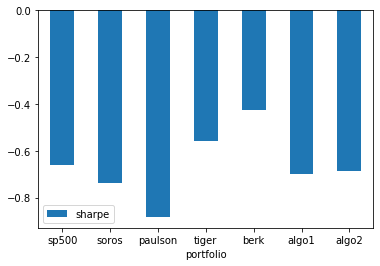

In [397]:
# Visualize the sharpe ratios as a bar plot

df = pd.DataFrame({'portfolio':['sp500', 'soros', 'paulson','tiger', 'berk', 'algo1', 'algo2'], 'sharpe':
    [
    sp500_sharpe_ratio, 
    soros_sharpe_ratio, 
    paulson_sharpe_ratio, 
    tiger_sharpe_ratio,
    berk_sharpe_ratio,
    algo1_sharpe_ratio,
    algo2_sharpe_ratio,
        ]
                })
df.head()
ax = df.plot.bar(x='portfolio', y='sharpe', rot=0)

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [398]:
# Read the first stock
sbux_csv = Path("Resources/sbux.csv")
sbux_df = pd.read_csv(sbux_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
sbux_df.sort_index(ascending = True, inplace = True)
sbux_df.head()

,Close
Date,
2014-01-02 16:00:00,38.59
2014-01-03 16:00:00,38.48
2014-01-06 16:00:00,38.09
2014-01-07 16:00:00,38.60
2014-01-08 16:00:00,39.02


In [399]:
#calculate daily returns for sbux
sbux_df["sbux returns"] = sbux_df.pct_change()


#delete Close
sbux_df.drop("Close",axis = 1, inplace = True)
sbux_df.head()

,sbux returns
Date,
2014-01-02 16:00:00,NaN
2014-01-03 16:00:00,-0.002850
2014-01-06 16:00:00,-0.010135
2014-01-07 16:00:00,0.013389
2014-01-08 16:00:00,0.010881


In [400]:
#check data types 
print(sbux_df.dtypes)
#sbux_df['Close']= sp500_df['Close'].astype('float')
#print(sbux_df.dtypes)
#print(sbux_df.head())

sbux returns    float64
dtype: object


In [401]:
# Read the second stock
ma_csv = Path("Resources/ma.csv")
ma_df = pd.read_csv(ma_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
ma_df.sort_index(ascending = True, inplace = True)
ma_df.head()

,Close
Date,
2014-01-02 16:00:00,83.41
2014-01-03 16:00:00,83.08
2014-01-06 16:00:00,82.67
2014-01-07 16:00:00,83.71
2014-01-08 16:00:00,83.68


In [402]:
#calculate daily returns for ma
ma_df["ma returns"] = ma_df.pct_change()


#delete Close
ma_df.drop("Close",axis = 1, inplace = True)
ma_df.head()

,ma returns
Date,
2014-01-02 16:00:00,NaN
2014-01-03 16:00:00,-0.003956
2014-01-06 16:00:00,-0.004935
2014-01-07 16:00:00,0.012580
2014-01-08 16:00:00,-0.000358


In [403]:
# Read the third stock
crm_csv = Path("Resources/crm.csv")
crm_df = pd.read_csv(crm_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
crm_df.sort_index(ascending = True, inplace = True)
crm_df.head()

,Close
Date,
2014-01-02 16:00:00,54.86
2014-01-03 16:00:00,55.12
2014-01-06 16:00:00,54.23
2014-01-07 16:00:00,54.95
2014-01-08 16:00:00,56.94


In [404]:
#calculate daily returns for crm
crm_df["crm returns"] = crm_df.pct_change()


#delete Close
crm_df.drop("Close",axis = 1, inplace = True)
crm_df.head()

,crm returns
Date,
2014-01-02 16:00:00,NaN
2014-01-03 16:00:00,0.004739
2014-01-06 16:00:00,-0.016147
2014-01-07 16:00:00,0.013277
2014-01-08 16:00:00,0.036215


In [405]:
#Read the fourth stock
ntfx_csv = Path("Resources/ntfx.csv")
ntfx_df = pd.read_csv(ntfx_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
ntfx_df.sort_index(ascending = True, inplace = True)
ntfx_df.head()

,Close
Date,
2014-01-02 16:00:00,51.83
2014-01-03 16:00:00,51.87
2014-01-06 16:00:00,51.37
2014-01-07 16:00:00,48.50
2014-01-08 16:00:00,48.71


In [406]:
#calculate daily returns for ntfx
ntfx_df["ntfx returns"] = ntfx_df.pct_change()


#delete Close
ntfx_df.drop("Close",axis = 1, inplace = True)
ntfx_df.head()

,ntfx returns
Date,
2014-01-02 16:00:00,NaN
2014-01-03 16:00:00,0.000772
2014-01-06 16:00:00,-0.009639
2014-01-07 16:00:00,-0.055869
2014-01-08 16:00:00,0.004330


In [407]:
# Concatenate all stocks into a single DataFrame
combined2_df = pd.concat([sbux_df, ma_df, crm_df, ntfx_df], axis = 'columns', join = 'inner')
combined2_df.head()

,sbux returns,ma returns,crm returns,ntfx returns
Date,,,,
2014-01-02 16:00:00,NaN,NaN,NaN,NaN
2014-01-03 16:00:00,-0.002850,-0.003956,0.004739,0.000772
2014-01-06 16:00:00,-0.010135,-0.004935,-0.016147,-0.009639
2014-01-07 16:00:00,0.013389,0.012580,0.013277,-0.055869
2014-01-08 16:00:00,0.010881,-0.000358,0.036215,0.004330


In [408]:
# Reset the index
combined2_df.reset_index()
combined2_df.index = combined2_df.index.date
combined2_df.head()

,sbux returns,ma returns,crm returns,ntfx returns
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,-0.002850,-0.003956,0.004739,0.000772
2014-01-06,-0.010135,-0.004935,-0.016147,-0.009639
2014-01-07,0.013389,0.012580,0.013277,-0.055869
2014-01-08,0.010881,-0.000358,0.036215,0.004330


In [409]:
# Drop Nulls
combined2_df.isnull().sum()
combined2_df.dropna(inplace = True)
combined2_df.isnull().sum()
combined2_df.head()

,sbux returns,ma returns,crm returns,ntfx returns
2014-01-03,-0.002850,-0.003956,0.004739,0.000772
2014-01-06,-0.010135,-0.004935,-0.016147,-0.009639
2014-01-07,0.013389,0.012580,0.013277,-0.055869
2014-01-08,0.010881,-0.000358,0.036215,0.004330
2014-01-09,-0.005638,0.008126,-0.011416,-0.011497


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [410]:
# Calculate weighted portfolio returns
weights = [1/4, 1/4, 1/4, 1/4]

combined2_df["portfolio returns"]= (combined2_df["sbux returns"]*weights[0])+(combined2_df["ma returns"]*weights[1])+(combined2_df["crm returns"]*weights[2])+(combined2_df["ntfx returns"]*weights[3])
combined2_df.head()


,sbux returns,ma returns,crm returns,ntfx returns,portfolio returns
2014-01-03,-0.002850,-0.003956,0.004739,0.000772,-0.000324
2014-01-06,-0.010135,-0.004935,-0.016147,-0.009639,-0.010214
2014-01-07,0.013389,0.012580,0.013277,-0.055869,-0.004156
2014-01-08,0.010881,-0.000358,0.036215,0.004330,0.012767
2014-01-09,-0.005638,0.008126,-0.011416,-0.011497,-0.005106


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [411]:
#join all portfolios together
combined_all_df = pd.concat([combined_df, combined2_df], axis = 'columns', join = 'inner')
combined_all_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily,ema21,sbux returns,ma returns,crm returns,ntfx returns,portfolio returns
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.004539,-0.002335,-0.011411,-0.022057,-0.011514,-0.011829
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.004462,-0.010000,0.008135,-0.030919,-0.010469,-0.010813
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.002514,0.006233,0.011994,0.010943,-0.004470,0.006175
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.005575,-0.015164,-0.021765,-0.015704,-0.029038,-0.020418
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.003543,0.008892,0.003635,0.014250,-0.018653,0.002031


In [412]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_all_df.isnull().sum()
combined_all_df.dropna(inplace = True)
combined_all_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500 Daily                    0
ema21                          0
sbux returns                   0
ma returns                     0
crm returns                    0
ntfx returns                   0
portfolio returns              0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

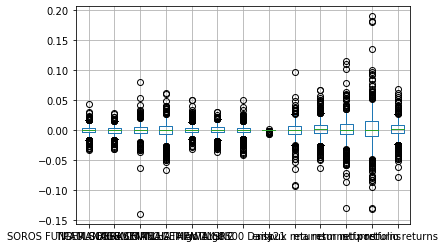

In [413]:
# Risk
combined_all_df.boxplot()

In [414]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?

combined_all_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Daily                    0.008554
ema21                          0.000964
sbux returns                   0.012970
ma returns                     0.013535
crm returns                    0.018236
ntfx returns                   0.026766
portfolio returns              0.013736
dtype: float64

In [415]:
# Determine which portfolios are riskier than the S&P 500
for col in combined_all_df:
    if combined_all_df[col].std()> combined_all_df['SP500 Daily'].std():
        print(f'{col} is riskier than the S&P 500')
    elif combined_all_df[col].std() < combined_all_df['SP500 Daily'].std():
        print(f'{col} is less risky than the S&P 500')
    else:
        print(f'{col} has the same risk as the S&P 500')

SOROS FUND MANAGEMENT LLC is less risky than the S&P 500
PAULSON & CO.INC.  is less risky than the S&P 500
TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P 500
BERKSHIRE HATHAWAY INC is riskier than the S&P 500
Algo 1 is less risky than the S&P 500
Algo 2 is less risky than the S&P 500
SP500 Daily has the same risk as the S&P 500
ema21 is less risky than the S&P 500
sbux returns is riskier than the S&P 500
ma returns is riskier than the S&P 500
crm returns is riskier than the S&P 500
ntfx returns is riskier than the S&P 500
portfolio returns is riskier than the S&P 500


In [432]:
# Calculate the annualized standard deviation (252 trading days)

annualized = combined_all_df.std() * np.sqrt(252)
annualized.sort_values(inplace=True)
print(annualized)

ema21                          0.015301
PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500 Daily                    0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
sbux returns                   0.205890
ma returns                     0.214863
portfolio returns              0.218056
crm returns                    0.289491
ntfx returns                   0.424901
dtype: float64


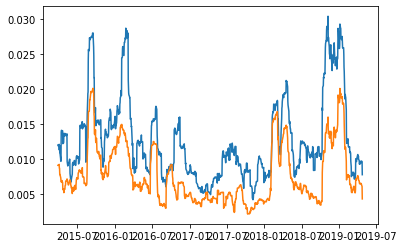

In [417]:
# Rolling - Calculate and plot the rolling standard deviation for the portfolio vs the S&P 500 using a 21 day window
combined_all_df['portfolio returns'].rolling(window=21).std().plot()
combined_all_df["SP500 Daily"].rolling(window=21).std().plot()

The portfolio beta is 1.2476


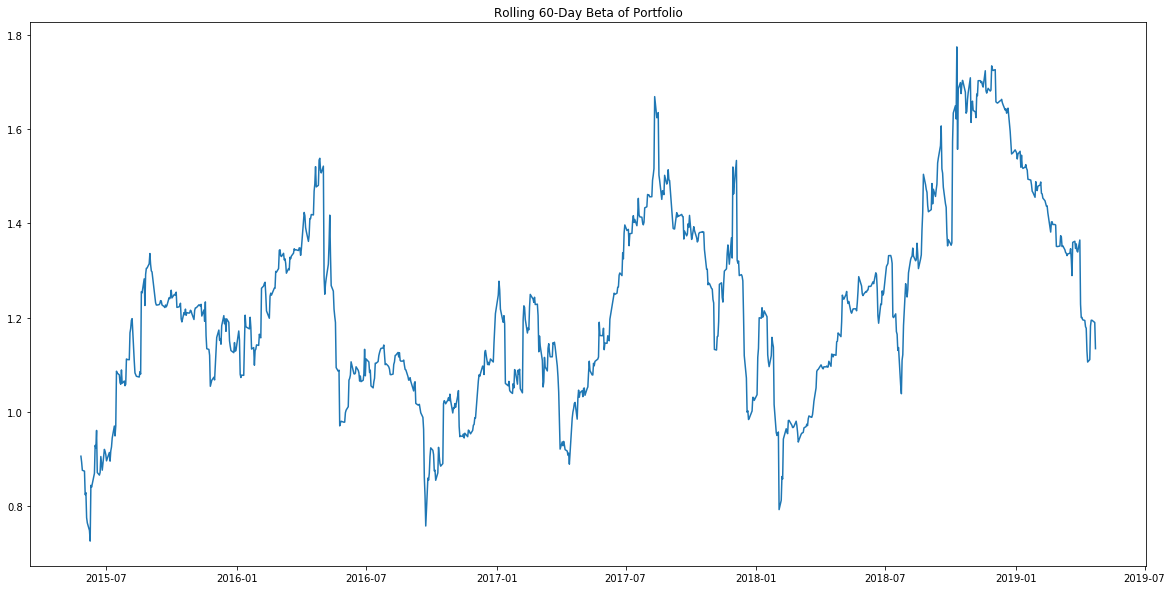

In [435]:
# Beta
from scipy import stats
(beta, alpha) = stats.linregress(combined_all_df["SP500 Daily"],
                combined_all_df["portfolio returns"])[0:2]
                
print("The portfolio beta is", round(beta, 4))

# Calculate Beta for portfolio compared to the total market (S&P 500)

rolling_covariance = combined_all_df['portfolio returns'].rolling(window=60).cov(combined_all_df['SP500 Daily'])
rolling_variance = combined_all_df['SP500 Daily'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Portfolio')

In [419]:
# Annualized Sharpe Ratios
risk_free = .006
sp500_sharpe_ratio = (combined_all_df['SP500 Daily'].mean()-risk_free)/combined_all_df['SP500 Daily'].std()
soros_sharpe_ratio = (combined_all_df['SOROS FUND MANAGEMENT LLC'].mean()-risk_free)/combined_all_df['SOROS FUND MANAGEMENT LLC'].std()
paulson_sharpe_ratio = (combined_all_df['PAULSON & CO.INC. '].mean()-risk_free)/combined_all_df['PAULSON & CO.INC. '].std()
tiger_sharpe_ratio = (combined_all_df['TIGER GLOBAL MANAGEMENT LLC'].mean()-risk_free)/combined_all_df['TIGER GLOBAL MANAGEMENT LLC'].std()
berk_sharpe_ratio = (combined_all_df['BERKSHIRE HATHAWAY INC'].mean()-risk_free)/combined_all_df['BERKSHIRE HATHAWAY INC'].std()
algo1_sharpe_ratio = (combined_all_df['Algo 1'].mean()-risk_free)/combined_all_df['Algo 1'].std()
algo2_sharpe_ratio = (combined_all_df['Algo 2'].mean()-risk_free)/combined_all_df['Algo 2'].std()
sbux_sharpe_ratio = (combined_all_df['sbux returns'].mean()-risk_free)/combined_all_df['sbux returns'].std()
ma_sharpe_ratio = (combined_all_df['ma returns'].mean()-risk_free)/combined_all_df['ma returns'].std()
crm_sharpe_ratio = (combined_all_df['crm returns'].mean()-risk_free)/combined_all_df['crm returns'].std()
ntfx_sharpe_ratio = (combined_all_df['ntfx returns'].mean()-risk_free)/combined_all_df['ntfx returns'].std()
portfolio_sharpe_ratio = (combined_all_df['portfolio returns'].mean()-risk_free)/combined_all_df['portfolio returns'].std()

sp500_sharpe_ratio_annualized = sp500_sharpe_ratio*(252**.5)
soros_sharpe_ratio_annualized = soros_sharpe_ratio*(252**.5)
paulson_sharpe_ratio_annualized = paulson_sharpe_ratio*(252**.5)
tiger_sharpe_ratio_annualized = tiger_sharpe_ratio*(252**.5)
berk_sharpe_ratio_annualized = berk_sharpe_ratio*(252**.5)
algo1_sharpe_ratio_annualized = algo1_sharpe_ratio*(252**.5)
algo2_sharpe_ratio_annualized = algo2_sharpe_ratio*(252**.5)
sbux_sharpe_ratio_annualized = sbux_sharpe_ratio*(252**.5)
ma_sharpe_ratio_annualized = ma_sharpe_ratio*(252**.5)
crm_sharpe_ratio_annualized = crm_sharpe_ratio*(252**.5)
ntfx_sharpe_ratio_annualized = ntfx_sharpe_ratio*(252**.5)
portfolio_sharpe_ratio_annualized = portfolio_sharpe_ratio*(252**.5)

print(sp500_sharpe_ratio)
print(soros_sharpe_ratio)
print(paulson_sharpe_ratio)
print(tiger_sharpe_ratio)
print(berk_sharpe_ratio)
print(algo1_sharpe_ratio)
print(algo2_sharpe_ratio)
print(sbux_sharpe_ratio)
print(ma_sharpe_ratio)
print(crm_sharpe_ratio)
print(ntfx_sharpe_ratio)
print(portfolio_sharpe_ratio)

-0.6606112318330459
-0.7374867214241613
-0.884788179953599
-0.5583894623220824
-0.42527559305335977
-0.7005340140365766
-0.6876453605097063
-0.42075055867889233
-0.36757091763243327
-0.2748439552022776
-0.14941844441220076
-0.35387622773754557


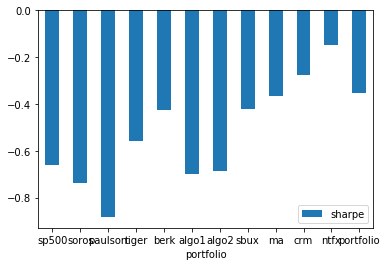

In [420]:
# Visualize the sharpe ratios as a bar plot
df = pd.DataFrame({'portfolio':['sp500', 'soros', 'paulson','tiger', 'berk', 'algo1', 'algo2','sbux', 'ma', 'crm','ntfx','portfolio'], 'sharpe':
    [
    sp500_sharpe_ratio, 
    soros_sharpe_ratio, 
    paulson_sharpe_ratio, 
    tiger_sharpe_ratio,
    berk_sharpe_ratio,
    algo1_sharpe_ratio,
    algo2_sharpe_ratio,
    sbux_sharpe_ratio,
    ma_sharpe_ratio,
    crm_sharpe_ratio,
    ntfx_sharpe_ratio,
    portfolio_sharpe_ratio,
        ]
                })
df.head()
ax = df.plot.bar(x='portfolio', y='sharpe', rot=0)

## Include correlation analysis to determine which stocks (if any) are correlated

In [421]:
# correlation
corr_matrix = combined_all_df.corr()
print(corr_matrix)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
SP500 Daily                                   0.837864            0.669732   
ema21                                         0.211051            0.158106   
sbux returns                                  0.467245            0.338881   
ma returns                                    0.670455            0.482633   
crm returns                                   0.580692            0.430166   
ntfx returns                                  0.461421          

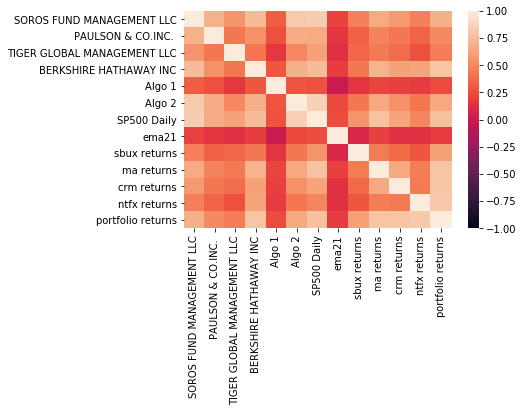

In [422]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1)